# training on existing Data

In [1]:
import numpy as np
import cv2 
import os
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
actions = ['sister','hurry','hungry','meal','brother','tree','heavy','cry','family','wise']

In [3]:
actions

['sister',
 'hurry',
 'hungry',
 'meal',
 'brother',
 'tree',
 'heavy',
 'cry',
 'family',
 'wise']

In [4]:
train_data = np.concatenate([
    np.load(os.path.join("final_aug","1",'train_features.npy')),
    np.load(os.path.join("final_aug","2",'train_features.npy')),
    np.load(os.path.join("final_aug","3",'train_features.npy')),
    np.load(os.path.join("final_aug","4",'train_features.npy')),
    np.load(os.path.join("final_aug","5",'train_features.npy')),
    np.load(os.path.join("final_aug","6",'train_features.npy')),
    np.load(os.path.join("final_reduced",'train_features.npy')),
])

train_labels = np.concatenate([
    np.load(os.path.join("final_aug","1",'train_labels.npy')),
    np.load(os.path.join("final_aug","2",'train_labels.npy')),
    np.load(os.path.join("final_aug","3",'train_labels.npy')),
    np.load(os.path.join("final_aug","4",'train_labels.npy')),
    np.load(os.path.join("final_aug","5",'train_labels.npy')),
    np.load(os.path.join("final_aug","6",'train_labels.npy')),
    np.load(os.path.join("final_reduced",'train_labels.npy')),
])
val_data    = np.load(os.path.join("final_reduced",'val_features.npy')) 
val_labels  = np.load(os.path.join("final_reduced",'val_labels.npy')) 
test_data   = np.load(os.path.join("final_reduced",'test_features.npy')) 
test_labels = np.load(os.path.join("final_reduced",'test_labels.npy'))  



print(
train_data.shape,
    train_labels.shape,
    val_data.shape,
    val_labels.shape,
    test_data.shape,
    test_labels.shape
    
)

(8687, 20, 62) (8687,) (190, 20, 62) (190,) (168, 20, 62) (168,)


In [5]:
perm = np.random.permutation(len(train_data))

train_X = train_data[perm]
train_Y = train_labels[perm]
val_X = val_data
val_Y = val_labels
test_X = test_data
test_Y = test_labels

print(
train_X.shape,
train_Y.shape,
val_X.shape,
val_Y.shape,
test_X.shape,
test_Y.shape,
)


(8687, 20, 62) (8687,) (190, 20, 62) (190,) (168, 20, 62) (168,)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping

# v1 ->95% training , 88% validation,84% test
v1 =  os.path.join("final_train_weights","first_model_V1.h5")
best_model_file_name = os.path.join("final_train_weights","second_model_V1.h5")


checkpoint = ModelCheckpoint(os.path.join(best_model_file_name), monitor='loss', verbose=0,
    save_best_only=True, mode='auto', save_freq=1)
earlyStopping = EarlyStopping(monitor='loss', patience=20)

In [11]:
def first_model():
    input_layer = Input(shape=(20,62))
    layer = LSTM(64,return_sequences=True,activation="relu")(input_layer)
    layer = LSTM(128,return_sequences=True,activation="relu")(layer)
    layer = LSTM(256,return_sequences=True,activation="relu")(layer)
    layer = LSTM(128,return_sequences=True,activation="relu")(layer)
    layer = LSTM(64,return_sequences=False,activation="relu")(layer)
    layer = Dense(64,activation="relu")(layer)
    layer = Dense(len(actions),activation="softmax")(layer)

    model = Model(inputs=input_layer,outputs=layer)
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


def second_model():
    input_layer = Input(shape=(20,62))
    layer = LSTM(64,return_sequences=True,activation="relu")(input_layer)
    layer = LSTM(128,return_sequences=True,activation="relu")(layer)
    layer = Dropout(0.5)(layer)
    layer = LSTM(256,return_sequences=True,activation="relu")(layer)
    layer = Dropout(0.5)(layer)
    layer = LSTM(128,return_sequences=True,activation="relu")(layer)
    layer = Dropout(0.5)(layer)
    layer = LSTM(64,return_sequences=False,activation="relu")(layer)
    layer = Dense(64,activation="relu")(layer)
    layer = Dense(len(actions),activation="softmax")(layer)

    model = Model(inputs=input_layer,outputs=layer)
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    
    return model

def third_model():
    input_layer = Input(shape=(20,62))
    layer = LSTM(64,return_sequences=True,activation="relu")(input_layer)
    layer = LSTM(128,return_sequences=True,activation="relu")(layer)
    layer = LSTM(96,return_sequences=False,activation="relu")(layer)
    layer = Dense(64,activation="relu")(layer)
    layer = Dense(32,activation="relu")(layer)
    layer = Dense(len(actions),activation="softmax")(layer)

#     optimizer = tf.keras.optimizers.Nadam(learning_rate=0.002,
#                              beta_1=0.9,
#                              beta_2=0.999, 
#                              epsilon=1e-08,
#                              schedule_decay=0.004)
    
    model = Model(inputs=input_layer,outputs=layer)
    model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


model = second_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 62)]          0         
                                                                 
 lstm_5 (LSTM)               (None, 20, 64)            32512     
                                                                 
 lstm_6 (LSTM)               (None, 20, 128)           98816     
                                                                 
 dropout_3 (Dropout)         (None, 20, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 20, 256)           394240    
                                                                 
 dropout_4 (Dropout)         (None, 20, 256)           0         
                                                                 
 lstm_8 (LSTM)               (None, 20, 128)           1971

In [28]:
# history = model.fit(train_X, train_Y, epochs=80, callbacks=[checkpoint,earlyStopping],validation_data=(val_X,val_Y),batch_size=16)

Epoch 1/80
543/543 [==============================] - 150s 266ms/step - loss: 0.1487 - accuracy: 0.9388 - val_loss: 0.2372 - val_accuracy: 0.9316
Epoch 2/80
543/543 [==============================] - 131s 241ms/step - loss: 0.3441 - accuracy: 0.8941 - val_loss: 0.3844 - val_accuracy: 0.9000
Epoch 3/80
543/543 [==============================] - 133s 245ms/step - loss: 0.1357 - accuracy: 0.9454 - val_loss: 0.4006 - val_accuracy: 0.8842
Epoch 4/80
543/543 [==============================] - 134s 247ms/step - loss: 84.4418 - accuracy: 0.8338 - val_loss: 0.3312 - val_accuracy: 0.9158
Epoch 5/80
543/543 [==============================] - 131s 242ms/step - loss: 0.1623 - accuracy: 0.9351 - val_loss: 0.4105 - val_accuracy: 0.8895
Epoch 6/80
543/543 [==============================] - 132s 243ms/step - loss: 0.1392 - accuracy: 0.9456 - val_loss: 0.3598 - val_accuracy: 0.9158
Epoch 7/80
543/543 [==============================] - 132s 243ms/step - loss: 0.1144 - accuracy: 0.9548 - val_loss: 0.3384 

KeyboardInterrupt: 

In [33]:
m2 = first_model()
m2.load_weights(os.path.join(best_model_file_name))
print(
    m2.evaluate(train_X,train_Y),
    m2.evaluate(val_X,val_Y),
    m2.evaluate(test_X,test_Y)
)

6/6 [==============================] - 0s 11ms/step - loss: 0.4650 - accuracy: 0.8690
[0.0862136259675026, 0.9713364839553833] [0.39432308077812195, 0.9263157844543457] [0.46498429775238037, 0.8690476417541504]


In [31]:
model.save_weights(os.path.join(best_model_file_name))

In [12]:
model.load_weights(os.path.join(best_model_file_name))

# evaluation


- write matplotlib code to display both of them
- then write function to display history and evaluation just one time

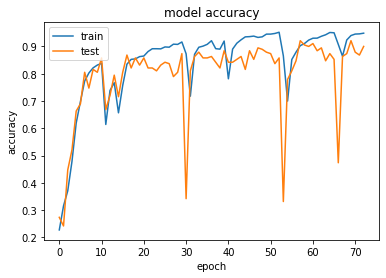

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

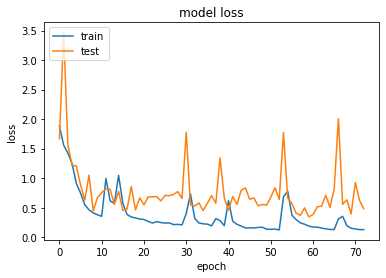

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
print(
    model.evaluate(train_X,train_Y),
    model.evaluate(val_X,val_Y),
    model.evaluate(test_X,test_Y)
)

6/6 [==============================] - 0s 11ms/step - loss: 0.6999 - accuracy: 0.8214
[0.09291575103998184, 0.9660412073135376] [0.594281017780304, 0.8736842274665833] [0.6998774409294128, 0.8214285969734192]


In [23]:
model = first_model()
model.load_weights(os.path.join("final_train_weights","first_model_V1.h5"))

In [24]:

for desired_class in range(10):
    x = []
    y = [] 
    for i,n in enumerate(val_Y):
        if n==desired_class:
            x.append(val_X[i])
            y.append(n)

    x = np.array(x)
    y = np.array(y)
    print(f"class : {desired_class}:{actions[desired_class]} -->",model.evaluate(x,y,verbose=0))
        

class : 0:sister --> [2.1439902782440186, 0.699999988079071]
class : 1:hurry --> [0.4425128996372223, 0.7894737124443054]
class : 2:hungry --> [0.23317945003509521, 0.8999999761581421]
class : 3:meal --> [0.05305203050374985, 0.9473684430122375]
class : 4:brother --> [0.9514178037643433, 0.699999988079071]
class : 5:tree --> [0.7925909757614136, 0.8500000238418579]
class : 6:heavy --> [0.0105934152379632, 1.0]
class : 7:cry --> [0.003288751933723688, 1.0]
class : 8:family --> [3.0288221751106903e-05, 1.0]
class : 9:wise --> [0.17635352909564972, 0.8947368264198303]


In [21]:
model = first_model()
model.load_weights(os.path.join("final_train_weights","first_model_V2.h5"))

In [22]:

for desired_class in range(10):
    x = []
    y = [] 
    for i,n in enumerate(val_Y):
        if n==desired_class:
            x.append(val_X[i])
            y.append(n)

    x = np.array(x)
    y = np.array(y)
    print(f"class : {desired_class}:{actions[desired_class]} -->",model.evaluate(x,y,verbose=0))
        

class : 0:sister --> [0.825576663017273, 0.8500000238418579]
class : 1:hurry --> [0.01183120533823967, 1.0]
class : 2:hungry --> [0.11262451112270355, 0.949999988079071]
class : 3:meal --> [0.5067373514175415, 0.8947368264198303]
class : 4:brother --> [1.662697434425354, 0.800000011920929]
class : 5:tree --> [0.34248995780944824, 0.8999999761581421]
class : 6:heavy --> [0.028256479650735855, 1.0]
class : 7:cry --> [0.06529584527015686, 1.0]
class : 8:family --> [0.0009215319296345115, 1.0]
class : 9:wise --> [0.23732376098632812, 0.8947368264198303]


In [ ]:
model = second_model()
model.load_weights(os.path.join("final_train_weights","second_model_V1.h5"))

In [18]:

for desired_class in range(10):
    x = []
    y = [] 
    for i,n in enumerate(val_Y):
        if n==desired_class:
            x.append(val_X[i])
            y.append(n)

    x = np.array(x)
    y = np.array(y)
    print(f"class : {desired_class}:{actions[desired_class]} -->",model.evaluate(x,y,verbose=0))
        

class : 0:sister --> [1.455183744430542, 0.75]
class : 1:hurry --> [0.24843087792396545, 0.8421052694320679]
class : 2:hungry --> [1.4502105712890625, 0.75]
class : 3:meal --> [0.39883410930633545, 0.8947368264198303]
class : 4:brother --> [0.8388317823410034, 0.800000011920929]
class : 5:tree --> [1.0407341718673706, 0.800000011920929]
class : 6:heavy --> [0.010108273476362228, 1.0]
class : 7:cry --> [0.0016583595424890518, 1.0]
class : 8:family --> [0.005287606734782457, 1.0]
class : 9:wise --> [0.2445170283317566, 0.9473684430122375]
